# Correlation Exploration

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandasql import sqldf

In [6]:
# Loading our combined dataset
passing_df = pd.read_excel('./DataFiles/passingGamelogs.xlsx')
goal_df = pd.read_excel('./DataFiles/goalGamelogs.xlsx')
defensive_df = pd.read_excel('./DataFiles/defensiveGamelogs.xlsx')
possession_df = pd.read_excel('./DataFiles/possessionGamelogs.xlsx')
shooting_df = pd.read_excel('./DataFiles/shootingGamelogs.xlsx')

In [8]:
#passing_df = passing_df[passing_df['Comp']=='MLS' & passing_df['Round']=='Regular Season']
passing_df = passing_df[(passing_df['Comp'] =='MLS') & (passing_df['Round'] =='Regular Season')]
goal_df = goal_df[(goal_df['Comp'] =='MLS') & (goal_df['Round'] =='Regular Season')]
defensive_df = defensive_df[(defensive_df['Comp'] =='MLS') & (defensive_df['Round'] =='Regular Season')]
possession_df = possession_df[(possession_df['Comp'] =='MLS') & (possession_df['Round'] =='Regular Season')]
shooting_df = shooting_df[(shooting_df['Comp'] =='MLS') & (shooting_df['Round'] =='Regular Season')]


### Shooting Exploration

In [18]:
shooting_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'Goals', 'Shots', 'Shots on Target', 'SoT%',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG.1',
       'G-xG', 'np:G-xG', 'Match Report', 'Team'],
      dtype='object')

In [20]:
shooting_dfcorr = shooting_df[[
       'xG', 'Shots', 'Shots on Target', 'SoT%',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt']]

In [22]:
std_scaler = StandardScaler()
 
shooting_scaled = std_scaler.fit_transform(shooting_dfcorr.to_numpy())
shooting_scaled = pd.DataFrame(shooting_scaled, columns=[
       'xG', 'Shots', 'Shots on Target', 'SoT%',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt'])

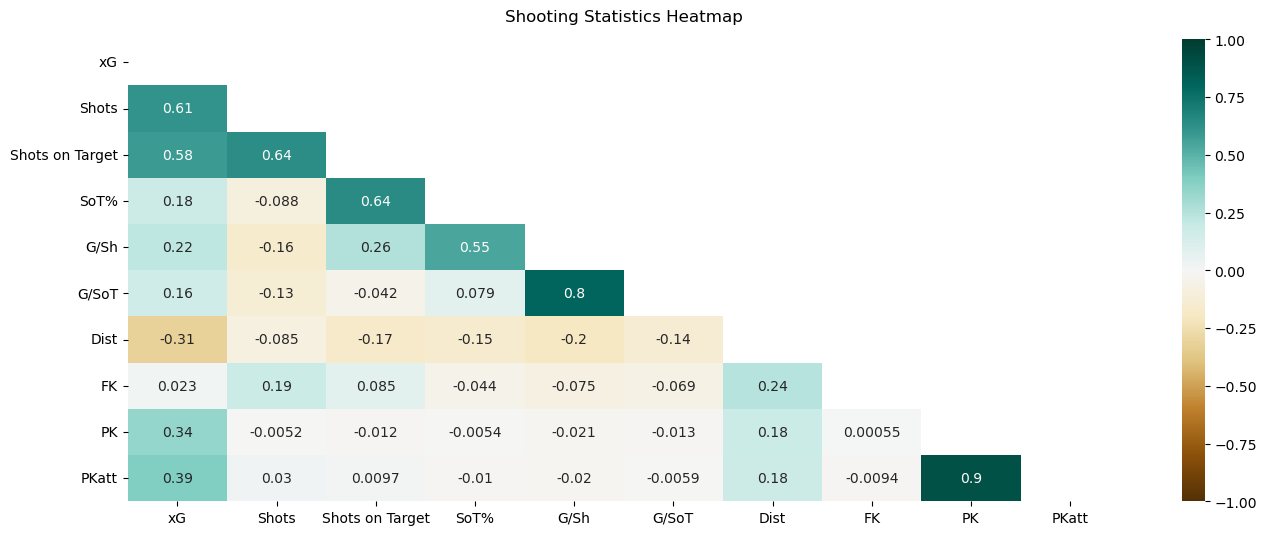

In [24]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(shooting_scaled.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(shooting_scaled.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Shooting Statistics Heatmap', fontdict={'fontsize':12}, pad=13);

## Passing Action Exploration

In [ ]:
# Need to join to shooting frame because expected goals is not apart of the this dataset

In [141]:
passing_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist',
       'Short Cmp', 'Short Att', 'Short Cmp%', 'Medium Cmp', 'Medium Att',
       'Medium Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xAG', 'xA',
       'KP', 'Third', 'PPA', 'CrsPA', 'PrgP', 'Match Report', 'Team'],
      dtype='object')

In [26]:
# Joining on "ID"
passingResult = pd.merge(shooting_df, passing_df, on=['Date','Team'], how='left')  


In [30]:
passing_dfcorr = passingResult[[
       'xG', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist',
       'Short Cmp', 'Short Att', 'Short Cmp%', 'Medium Cmp', 'Medium Att',
       'Medium Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xAG', 'xA',
       'KP', 'Third', 'PPA', 'CrsPA', 'PrgP']]

In [36]:
passing_dfcorr = passing_dfcorr.dropna()

In [38]:
std_scaler = StandardScaler()
 
passing_scaled = std_scaler.fit_transform(passing_dfcorr.to_numpy())
passing_scaled = pd.DataFrame(passing_scaled, columns=[
       'xG', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist',
       'Short Cmp', 'Short Att', 'Short Cmp%', 'Medium Cmp', 'Medium Att',
       'Medium Cmp%', 'Long Cmp', 'Long Att', 'Long Cmp%', 'Ast', 'xAG', 'xA',
       'KP', 'Third', 'PPA', 'CrsPA', 'PrgP'])

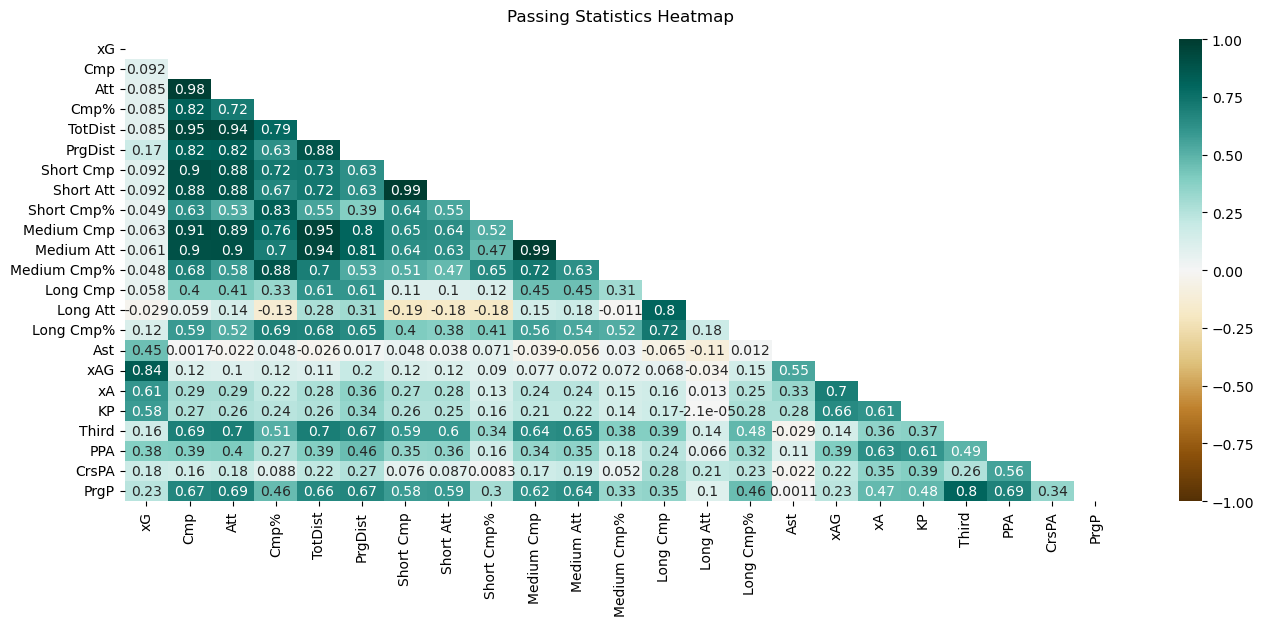

In [40]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(passing_scaled.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(passing_scaled.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Passing Statistics Heatmap', fontdict={'fontsize':12}, pad=13);

## Defensive Actions

In [162]:
defensive_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'Tackles', 'TklW', 'Def 3rd', 'Mid 3rd',
       'Att 3rd', 'Challenges Tackles', 'Challenge Attempts',
       'Challenge Tackle Percentage', 'Challenges Lost', 'Blocks', 'Blocks Sh',
       'Blocks Pass', 'Interception', 'Tackles Plus Interceptions', 'Clears',
       'Errors', 'Match Report', 'Team'],
      dtype='object')

In [164]:
defensive_df = defensive_df.dropna()

In [166]:
defensive_df['GF']= defensive_df['GF'].astype(int)
defensive_df['GA'] = defensive_df['GA'].astype(int)

In [168]:
defensive_df = defensive_df[[
       'GF', 'GA', 'Tackles', 'TklW', 'Def 3rd', 'Mid 3rd',
       'Att 3rd', 'Challenges Tackles', 'Challenge Attempts',
       'Challenge Tackle Percentage', 'Challenges Lost', 'Blocks', 'Blocks Sh',
       'Blocks Pass', 'Interception', 'Tackles Plus Interceptions', 'Clears',
       'Errors']]

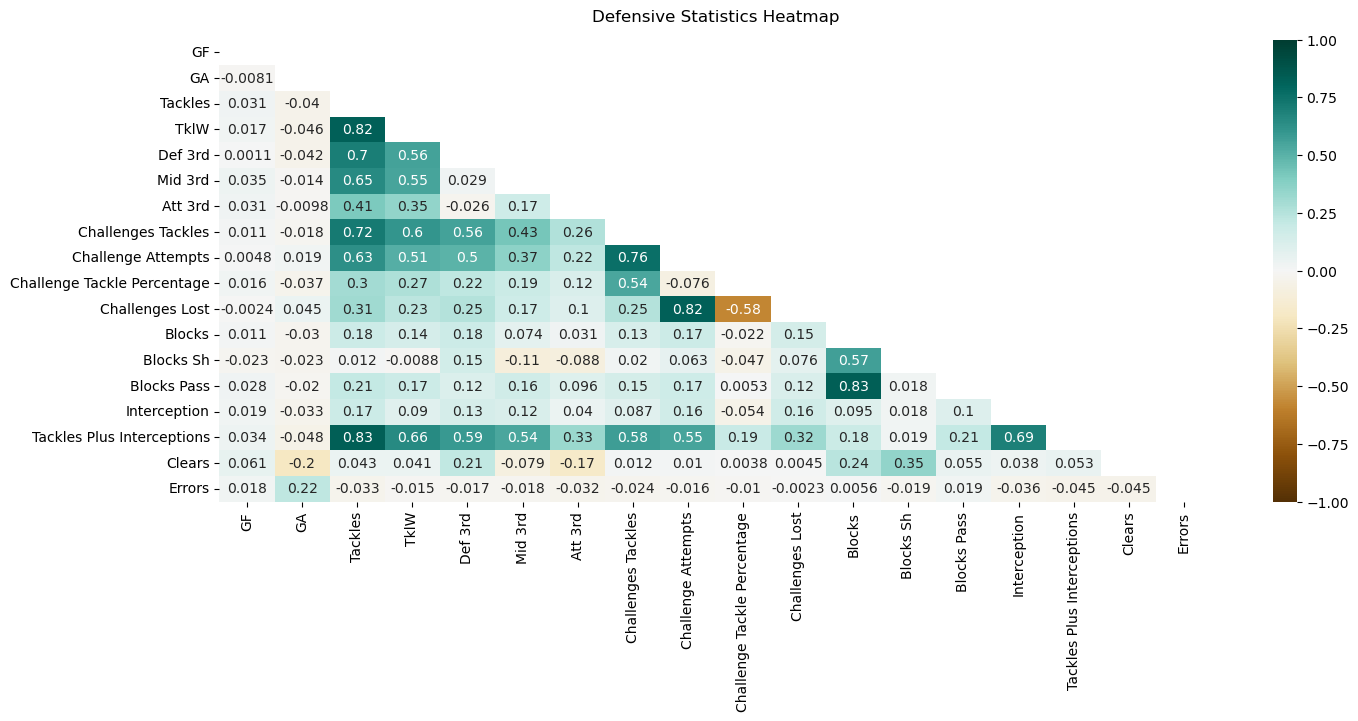

In [170]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(defensive_df.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(defensive_df.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Defensive Statistics Heatmap', fontdict={'fontsize':12}, pad=13);

## Possession Exploration

In [178]:
possession_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'Possessions', 'Touches', 'Def Pen', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Take On Attempts',
       'Successful Take On Attempts', 'Take On Suc%', 'Take On Tkld',
       'Take On Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Third',
       'CPA', 'MIS', 'Dis', 'Rec', 'PrgR', 'Match Report', 'Team'],
      dtype='object')

In [42]:
# Joining on "ID"
possessionResult = pd.merge(shooting_df, possession_df, on=['Date','Team'], how='left')  

In [44]:
possession_dfcorr = possessionResult[[
       'xG', 'Possessions', 'Touches', 'Def Pen', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Take On Attempts',
       'Successful Take On Attempts', 'Take On Suc%', 'Take On Tkld',
       'Take On Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Third',
       'CPA', 'MIS', 'Dis', 'Rec', 'PrgR']]

In [180]:
possession_dfcorr = possession_dfcorr.dropna()

In [46]:
#possession_df['GF']= possession_df['GF'].astype(int)
#possession_df['GA'] = possession_df['GA'].astype(int)

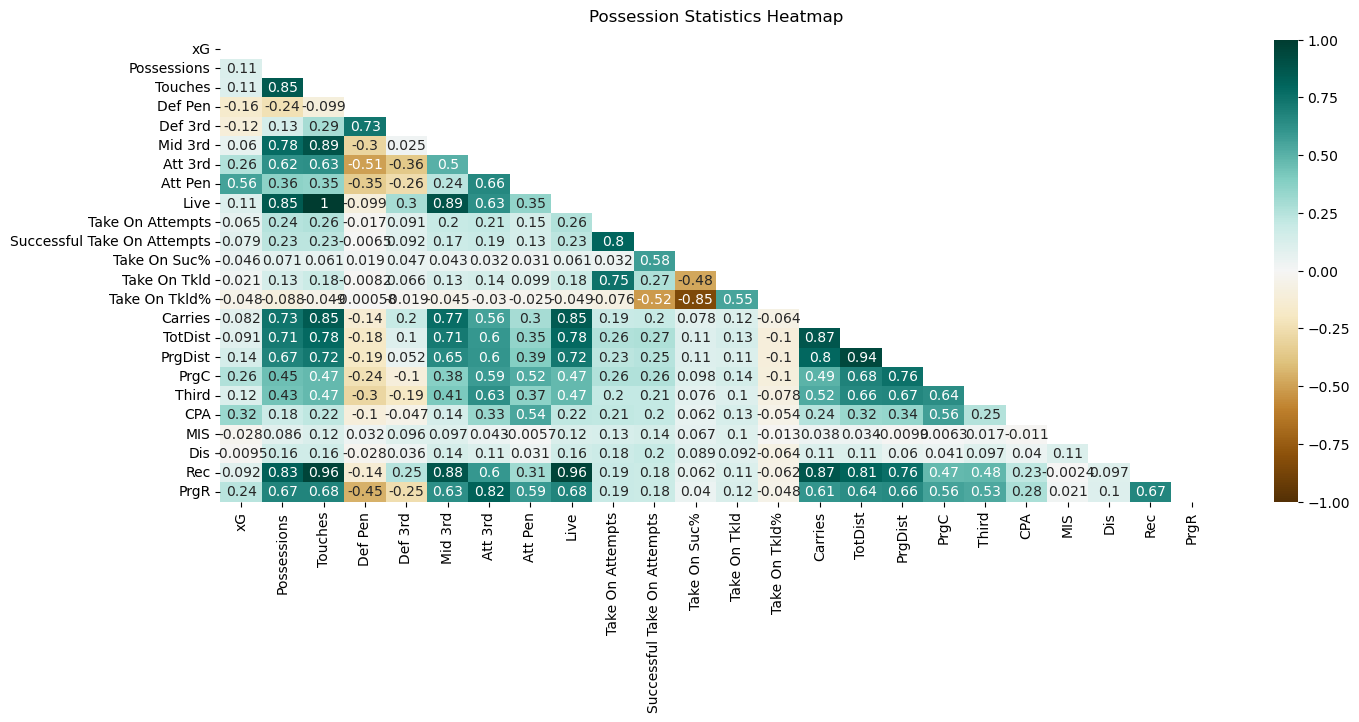

In [48]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(possession_dfcorr.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(possession_dfcorr.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Possession Statistics Heatmap', fontdict={'fontsize':12}, pad=13);

## Goal and Shot Creation Actions

In [192]:
goal_df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'Shot Creating Actions', 'SCA_PassLive',
       'SCA_PassDead', 'SCA_TO', 'SCA_Sh', 'SCA_Fld', 'SCA_Def',
       'Goal Creating Actions', 'GCA_PassLive', 'GCA_PassDead', 'GCA_TO',
       'GCA_Sh', 'GCA_Fld', 'GCA_Def', 'Match Report', 'Team'],
      dtype='object')

In [50]:
# Joining on "ID"
goalResult = pd.merge(shooting_df, goal_df, on=['Date','Team'], how='left')  

In [52]:
goal_dfcorr = goalResult[[
       'xG', 'Shot Creating Actions', 'SCA_PassLive',
       'SCA_PassDead', 'SCA_TO', 'SCA_Sh', 'SCA_Fld', 'SCA_Def',
       'Goal Creating Actions', 'GCA_PassLive', 'GCA_PassDead', 'GCA_TO',
       'GCA_Sh', 'GCA_Fld', 'GCA_Def']]

In [194]:
goal_dfcorr = goal_dfcorr.dropna()

In [54]:
#goal_df['GF']= goal_df['GF'].astype(int)
#goal_df['GA'] = goal_df['GA'].astype(int)

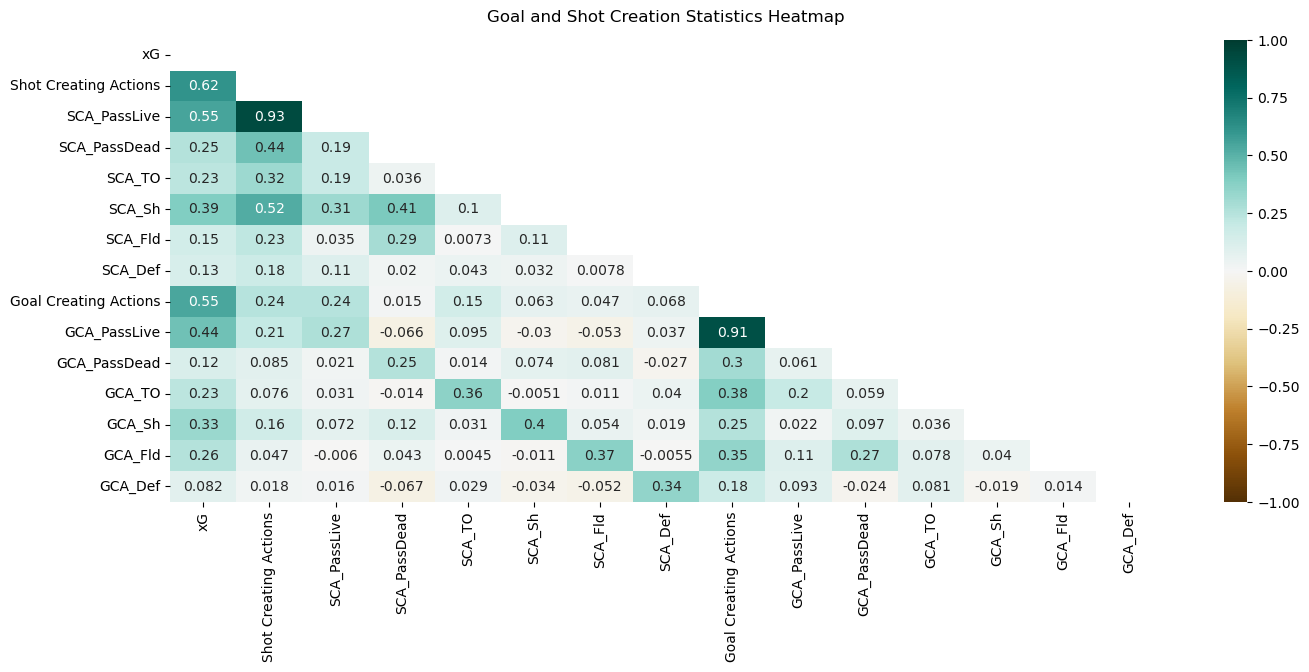

In [56]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(goal_dfcorr.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(goal_dfcorr.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Goal and Shot Creation Statistics Heatmap', fontdict={'fontsize':12}, pad=13);

### Total Dataframe Package

In [66]:
# Combining the two datasets to get the regular and advanced data on one sheet
# Using a pandasql library to perform the data join
run_query = lambda query: sqldf(query, globals())

query0 = '''
SELECT
shooting.[Date],
shooting.[Team],
shooting.[xG],
shooting.[Shots on Target],
shooting.[Shots],
passing.[KP],
possession.[Att Pen],
goal.[Shot Creating Actions],
goal.[SCA_PassLive],
goal.[Goal Creating Actions]
FROM shooting_df shooting
LEFT JOIN passing_df passing
    on shooting.Date = passing.Date
    and shooting.Team = passing.Team
LEFT JOIN possession_df possession
    on shooting.Date = possession.Date
    and shooting.Team = possession.Team  
LEFT JOIN goal_df goal
    on shooting.Date = goal.Date
    and shooting.Team = goal.Team  
'''

In [68]:
# Executing the query stated above
result_0 = run_query(query0)

In [72]:
result_0.columns

Index(['Date', 'Team', 'xG', 'Shots on Target', 'Shots', 'KP', 'Att Pen',
       'Shot Creating Actions', 'SCA_PassLive', 'Goal Creating Actions'],
      dtype='object')

In [74]:
result_corr = result_0[['xG', 'Shots on Target', 'Shots', 'KP', 'Att Pen',
       'Shot Creating Actions', 'SCA_PassLive', 'Goal Creating Actions']]

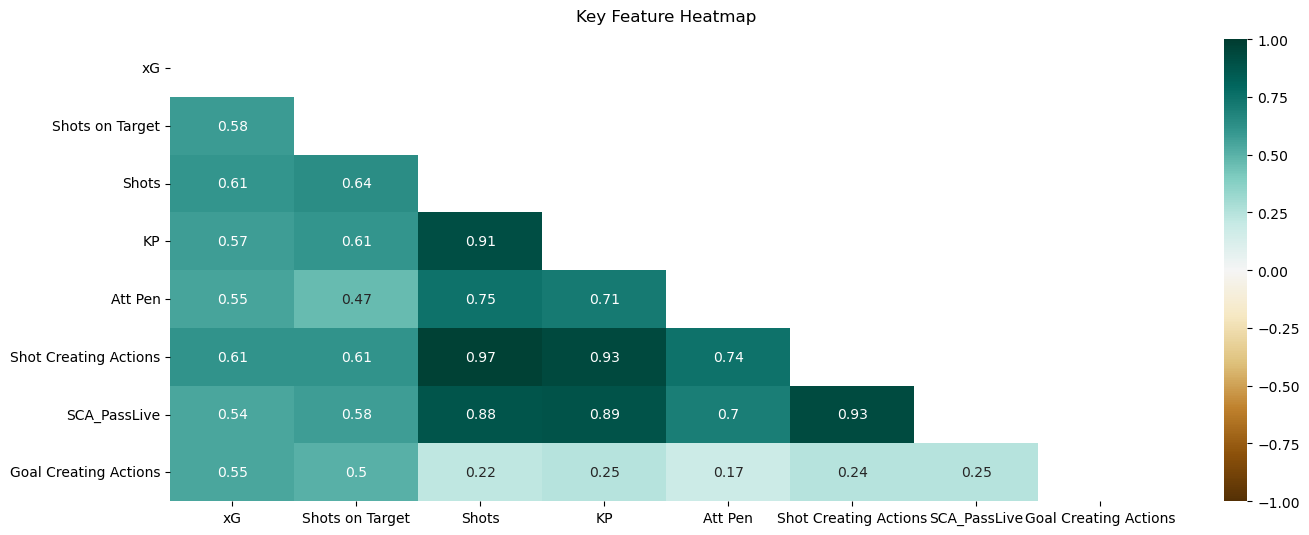

In [76]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(result_corr.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(result_corr.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Key Feature Heatmap', fontdict={'fontsize':12}, pad=13);